# Classification Algorithms on Credit Card Data

## Section 1: Introduction
<center><img src="https://ai-journey.com/wp-content/uploads/2019/06/fraud-EMV-chip-credit-card.jpg" width=500 height=300/></center>

In the fast-paced world of consumer credit, financial institutions face the critical challenge of managing risk while providing credit services to a broad client base. One of the most significant risks is the potential default of clients on their credit card payments. Defaulting can lead to substantial financial losses for banks and impact clients' creditworthiness, leading to long-term financial difficulties.

The `Default of Credit Card Clients` dataset, collected from 30,000 credit card holders in Taiwan, offers a comprehensive snapshot of the financial behavior and demographic characteristics of these clients. This dataset includes variables such as credit limit, payment history, age, marital status, and educational level, all of which play a crucial role in understanding the factors that contribute to the likelihood of default.

The primary objective is to develop a predictive model that can accurately assess the risk of a client defaulting on their credit card payment in the upcoming month. This model will enable the bank to make informed decisions regarding credit approvals, limit adjustments, and the implementation of preemptive measures to mitigate risk.



## Section 2: Understanding the dataset

Download the data here - https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

**Explanatory variables:**

- `ID`: ID of each client

- `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit

- `SEX`: Gender (1=male, 2=female)

- `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

- `MARRIAGE`: Marital status (1=married, 2=single, 3=others)

- `AGE`: Age in years

- `PAY_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

- `PAY_2`: Repayment status in August, 2005 (scale same as above)

- `PAY_3`: Repayment status in July, 2005 (scale same as above)

- `PAY_4`: Repayment status in June, 2005 (scale same as above)

- `PAY_5`: Repayment status in May, 2005 (scale same as above)

- `PAY_6`: Repayment status in April, 2005 (scale same as above)

- `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)

- `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)

- `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)

- `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)

- `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)

- `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)

- `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)

- `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)

- `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)

- `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)

- `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)

- `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)

- `default.payment.next.month`: Default payment (1=yes, 0=no)

## Section 3: Data Preprocessing
Data preprocessing involves preparing the raw data for analysis by cleaning, transforming, and organizing it. This step is crucial for ensuring the quality and consistency of the data before applying any machine learning models.




In [19]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

In [20]:
# Load the data

# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

# Read the Excel file, skipping the first row and using the second row as the header
data = pd.read_excel("/content/drive/MyDrive/datasets/credit_card/credit_card_clients.xls", skiprows=1, header=0)

# View the data
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
# Understand the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Observation:

- There are no missing values in the data set.
- The data types are accurately aligned.
- `ID` column might not be required for the analysis.
- The target variable shall be renamed making it short and meaningful.

In [22]:
# Removing the 'ID' column
data.drop(columns=['ID'], inplace=True)

# Renaming the target variable column
data.rename(columns={"default payment next month": "is_default"}, inplace=True)

# View the data
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,is_default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Class Imbalance
Class imbalance occurs in a dataset when the number of instances (or examples) in one class significantly outweighs the number of instances in other classes. For example, in a dataset used to predict fraud, there might be many more non-fraudulent transactions than fraudulent ones. This imbalance can cause problems when training a machine learning model because the model might become biased towards the majority class, leading to poor performance in predicting the minority class.

**Handling the class imbalance:**
- Resampling Techniques
  - Oversampling - Incresing the number of minority class samples
  - Undersampling - Decreasing the number of majority class samples
- Adjusting class weights

<center><img src="https://av-eks-blogoptimized.s3.amazonaws.com/1*H6XodlitlGDl9YdbwaZLMw.png" /></center>

In [23]:
# Check if there is class imbalance
data['is_default'].value_counts(normalize=True)

,proportion
is_default,
0,0.7788
1,0.2212


#### Observation:
- There is a heavy class imbalance.
- `Class 0` domainates the dataset. This might lead to inaccurate predictions. SO, this has to be handled.

## Section 4: EDA
EDA is the process of analyzing and visualizing the dataset to uncover underlying patterns, trends, and relationships. It helps in understanding the data's structure and guiding the feature selection and modeling process.

### 4.1 Checking the distribution of the target variable

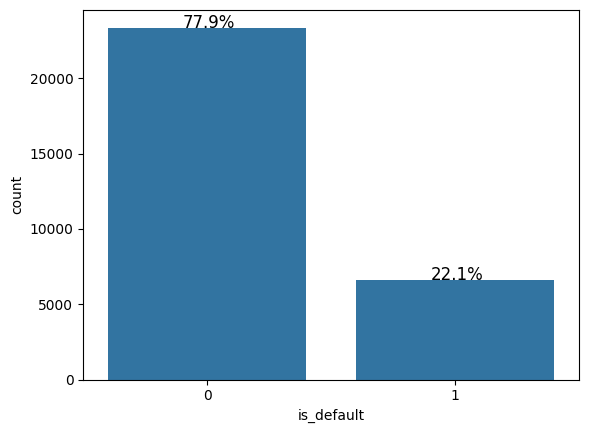

In [24]:
# Create a countplot to check the distribution of the target variable
ax = sns.countplot(x='is_default', data=data)

# Get total number of data points
total = data.shape[0]

# Calculate and add percentage text above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.show()

#### Interpretation:

- This plot confirms the class imbalance problem identified already.

### 4.2 Checking the distribution of the demographic variables like Age, Sex, Marriage, Education


<ipython-input-25-99ec51842c6d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)


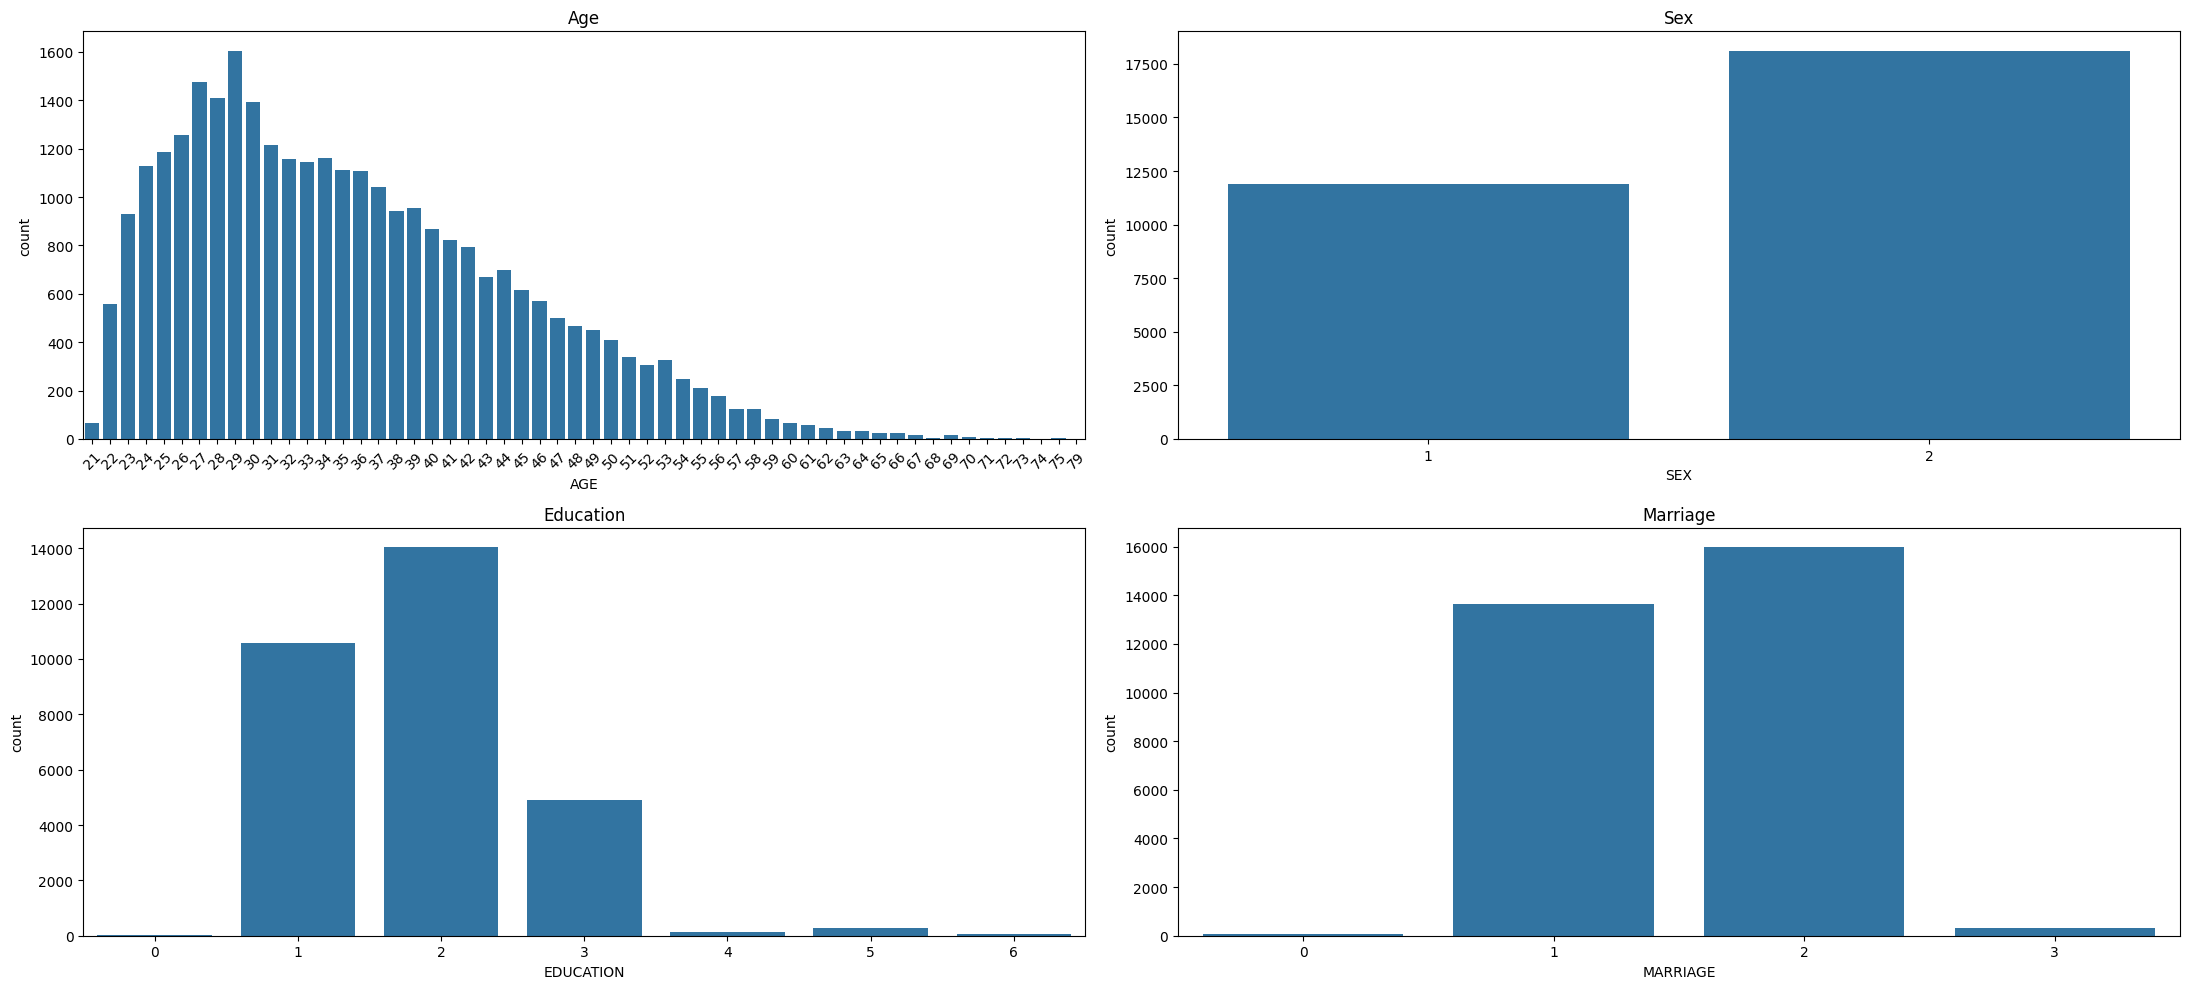

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(22, 10))

# Distribution of 'default payment next month' variable
sns.countplot(ax=axes[0, 0], x='AGE', data=data)
axes[0, 0].set_title('Age')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Distribution of 'SEX' variable
sns.countplot(ax=axes[0, 1], x='SEX', data=data)
axes[0, 1].set_title('Sex')

# Distribution of 'EDUCATION' variable
sns.countplot(ax=axes[1, 0], x='EDUCATION', data=data)
axes[1, 0].set_title('Education')

# Distribution of 'MARRIAGE' variable
sns.countplot(ax=axes[1, 1], x='MARRIAGE', data=data)
axes[1, 1].set_title('Marriage')

plt.tight_layout()
plt.show()

#### Interpretation:
Here’s a brief interpretation of each chart displayed in the image:

#### 1. **Age Distribution**:
   - The age distribution is skewed towards younger individuals, with the highest concentration of clients between the ages of 25 and 35. The number of clients decreases steadily as age increases.
   - This suggests that the majority of credit card clients are young adults, which may influence credit behavior and risk profiles.

#### 2. **Sex Distribution**:
   - There are more female clients (coded as '2') than male clients (coded as '1') in this dataset.
   - This could impact the analysis if sex is a significant factor in credit card default.

#### 3. **Education Level Distribution**:
   - Most clients have a university-level education (coded as '2'), followed by those with graduate school education (coded as '1'). The fewest clients fall into the categories of high school or other forms of education.
   - The dataset is dominated by well-educated individuals, which might influence the types of credit and financial behavior observed.

#### 4. **Marital Status Distribution**:
   - The majority of clients are single (coded as '2') or married (coded as '1'), with very few falling into other categories (coded as '3').
   - The marital status distribution may play a role in understanding financial responsibilities and default risks, as marital status often correlates with different financial obligations and stability.

These insights provide an understanding of the demographic makeup of the credit card clients in this dataset, which is crucial for further analysis, particularly in exploring correlations with credit behavior and default risk.

### 4.3 Checking the correlation of the above identified demographic variables with the target variable

<ipython-input-26-655ed90ff722>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = new_data.groupby(['AGE_GROUP', 'is_default']).size().reset_index(name='counts')
<ipython-input-26-655ed90ff722>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_totals = age_group_counts.groupby('AGE_GROUP').sum().reset_index().rename(columns={"counts": "total_counts"})


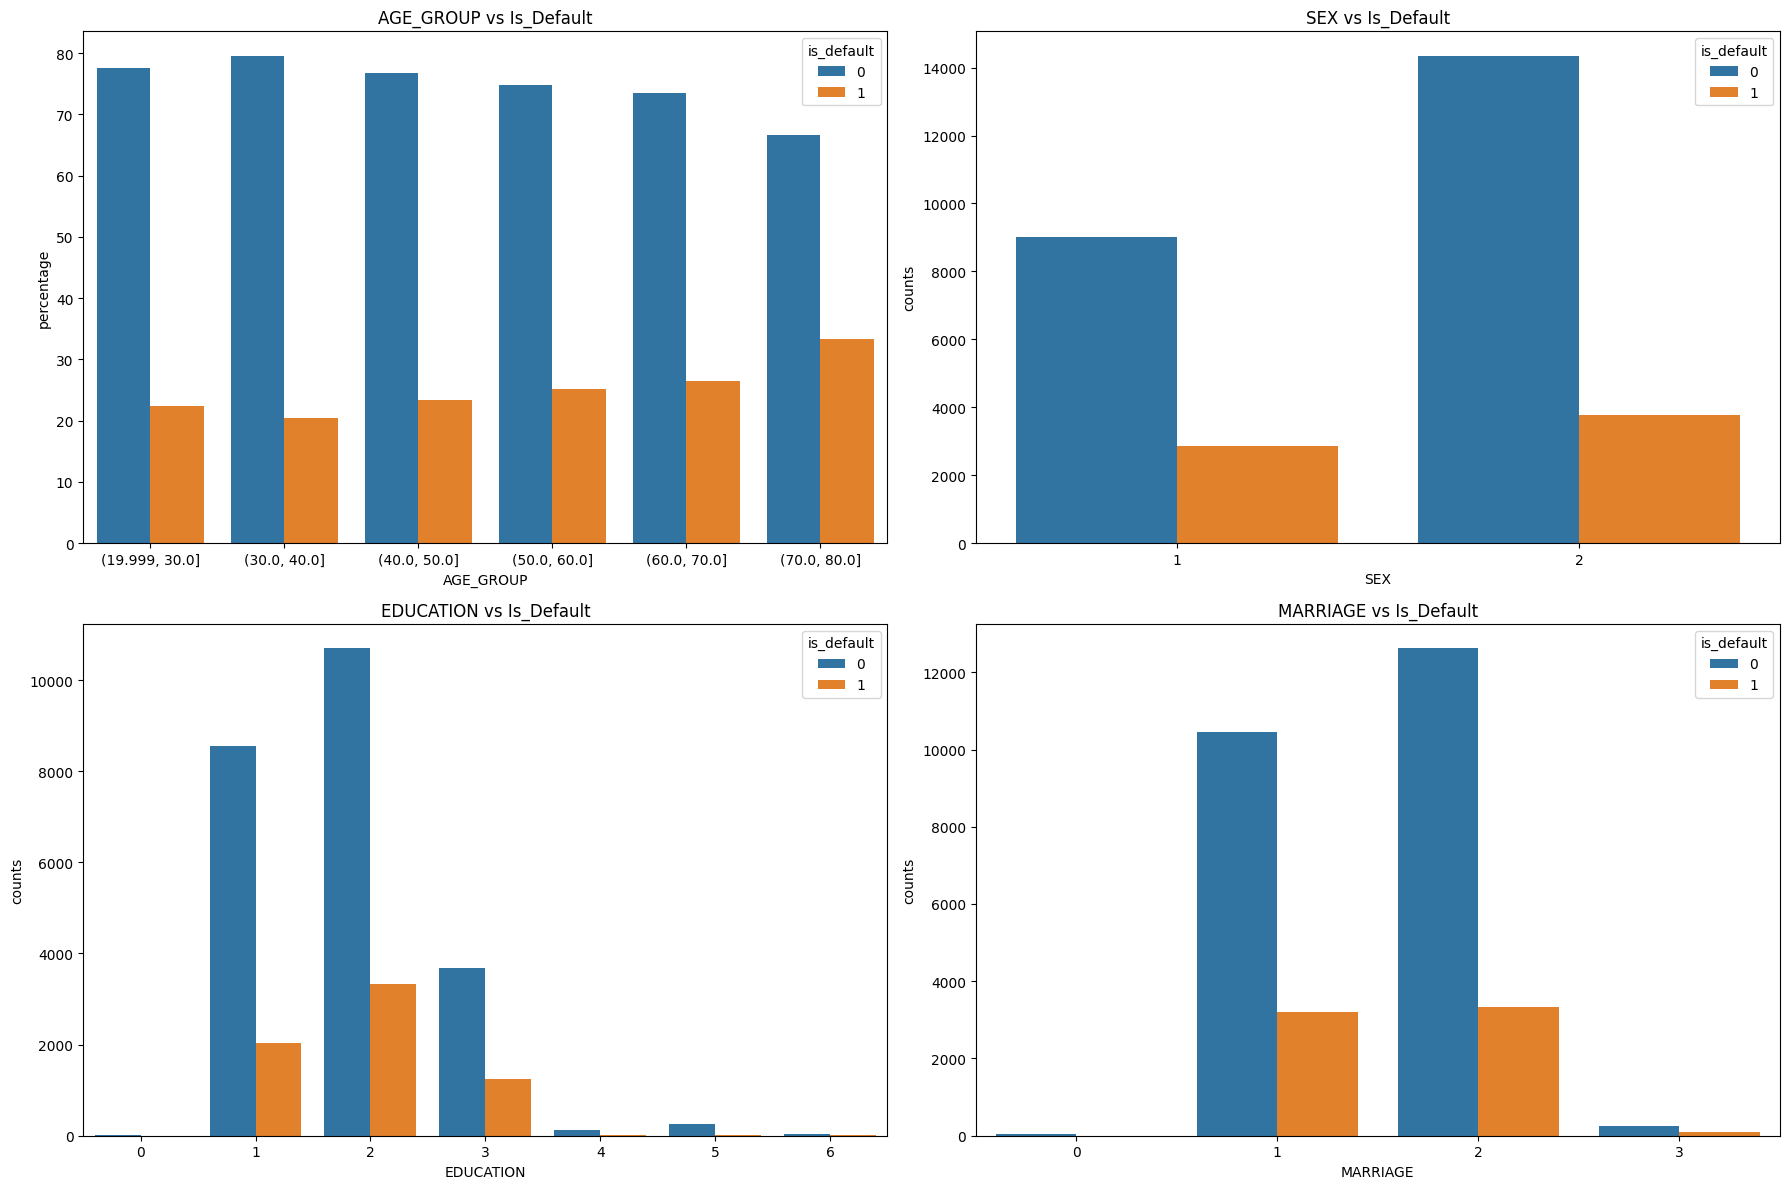

In [26]:
# Create a 2x2 grid of subplots in a single figure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))


# Creating a copy of the data for making a few changes for the plot
new_data = data.copy()

# There are too many values for age. So, let's group the values into bins for better insights.
# Bucketize age into groups

new_data['AGE_GROUP'] = pd.cut(new_data['AGE'], bins=[20, 30, 40, 50, 60, 70, 80], include_lowest=True)

# Grouped bar chart for 'AGE_GROUP' and 'is_default'
age_group_counts = new_data.groupby(['AGE_GROUP', 'is_default']).size().reset_index(name='counts')

# Calculate the total counts for each age group
age_group_totals = age_group_counts.groupby('AGE_GROUP').sum().reset_index().rename(columns={"counts": "total_counts"})

age_group_totals = age_group_totals[["AGE_GROUP", "total_counts"]]

# Merge the total counts back to the original dataframe
age_group_counts = pd.merge(age_group_counts, age_group_totals, on='AGE_GROUP')


# Calculate the percentage within each age group
age_group_counts['percentage'] = 100 * age_group_counts['counts'] / age_group_counts['total_counts']


# Grouped bar chart for 'AGE_GROUP' and 'is_default'
#age_group_counts = data.groupby(['AGE_GROUP', 'is_default']).size().reset_index(name='counts')
sns.barplot(ax=axes[0, 0], x='AGE_GROUP', y='percentage', hue='is_default', data=age_group_counts)
axes[0, 0].set_title('AGE_GROUP vs Is_Default')

# Grouped bar chart for 'SEX' and 'is_default'
sex_counts = new_data.groupby(['SEX', 'is_default']).size().reset_index(name='counts')
sns.barplot(ax=axes[0, 1], x='SEX', y='counts', hue='is_default', data=sex_counts)
axes[0, 1].set_title('SEX vs Is_Default')

# Grouped bar chart for 'EDUCATION' and 'is_default'
education_counts = new_data.groupby(['EDUCATION', 'is_default']).size().reset_index(name='counts')
sns.barplot(ax=axes[1, 0], x='EDUCATION', y='counts', hue='is_default', data=education_counts)
axes[1, 0].set_title('EDUCATION vs Is_Default')

# Grouped bar chart for 'MARRIAGE' and 'is_default'
marriage_counts = new_data.groupby(['MARRIAGE', 'is_default']).size().reset_index(name='counts')
sns.barplot(ax=axes[1, 1], x='MARRIAGE', y='counts', hue='is_default', data=marriage_counts)
axes[1, 1].set_title('MARRIAGE vs Is_Default')

plt.tight_layout()
plt.show()

#### Interpretation

#### 1. **Age Group vs. Default Status**:
   - Default rates are relatively consistent across age groups, with a slight increase in default rates for younger and older age groups (20-30 and 70-80).
   
#### 2. **Sex vs. Default Status**:
   - Females show a slightly higher default rate.
   

#### 3. **Education vs. Default Status**:
   - Those with lower education levels (e.g., high school, coded as `3`) show a relatively higher default percentage.
   - Lower education might be a risk factor for defaults. This needs to be carefully considered in the model to avoid bias towards predicting non-defaults in higher education groups.

#### 4. **Marital Status vs. Default Status**:
   - Married clients have a relatively higher proportion of defaults compared to single clients.
   - The higher default rate among married clients might indicate additional financial responsibilities.

### 4.3 Finding correlation of the variables

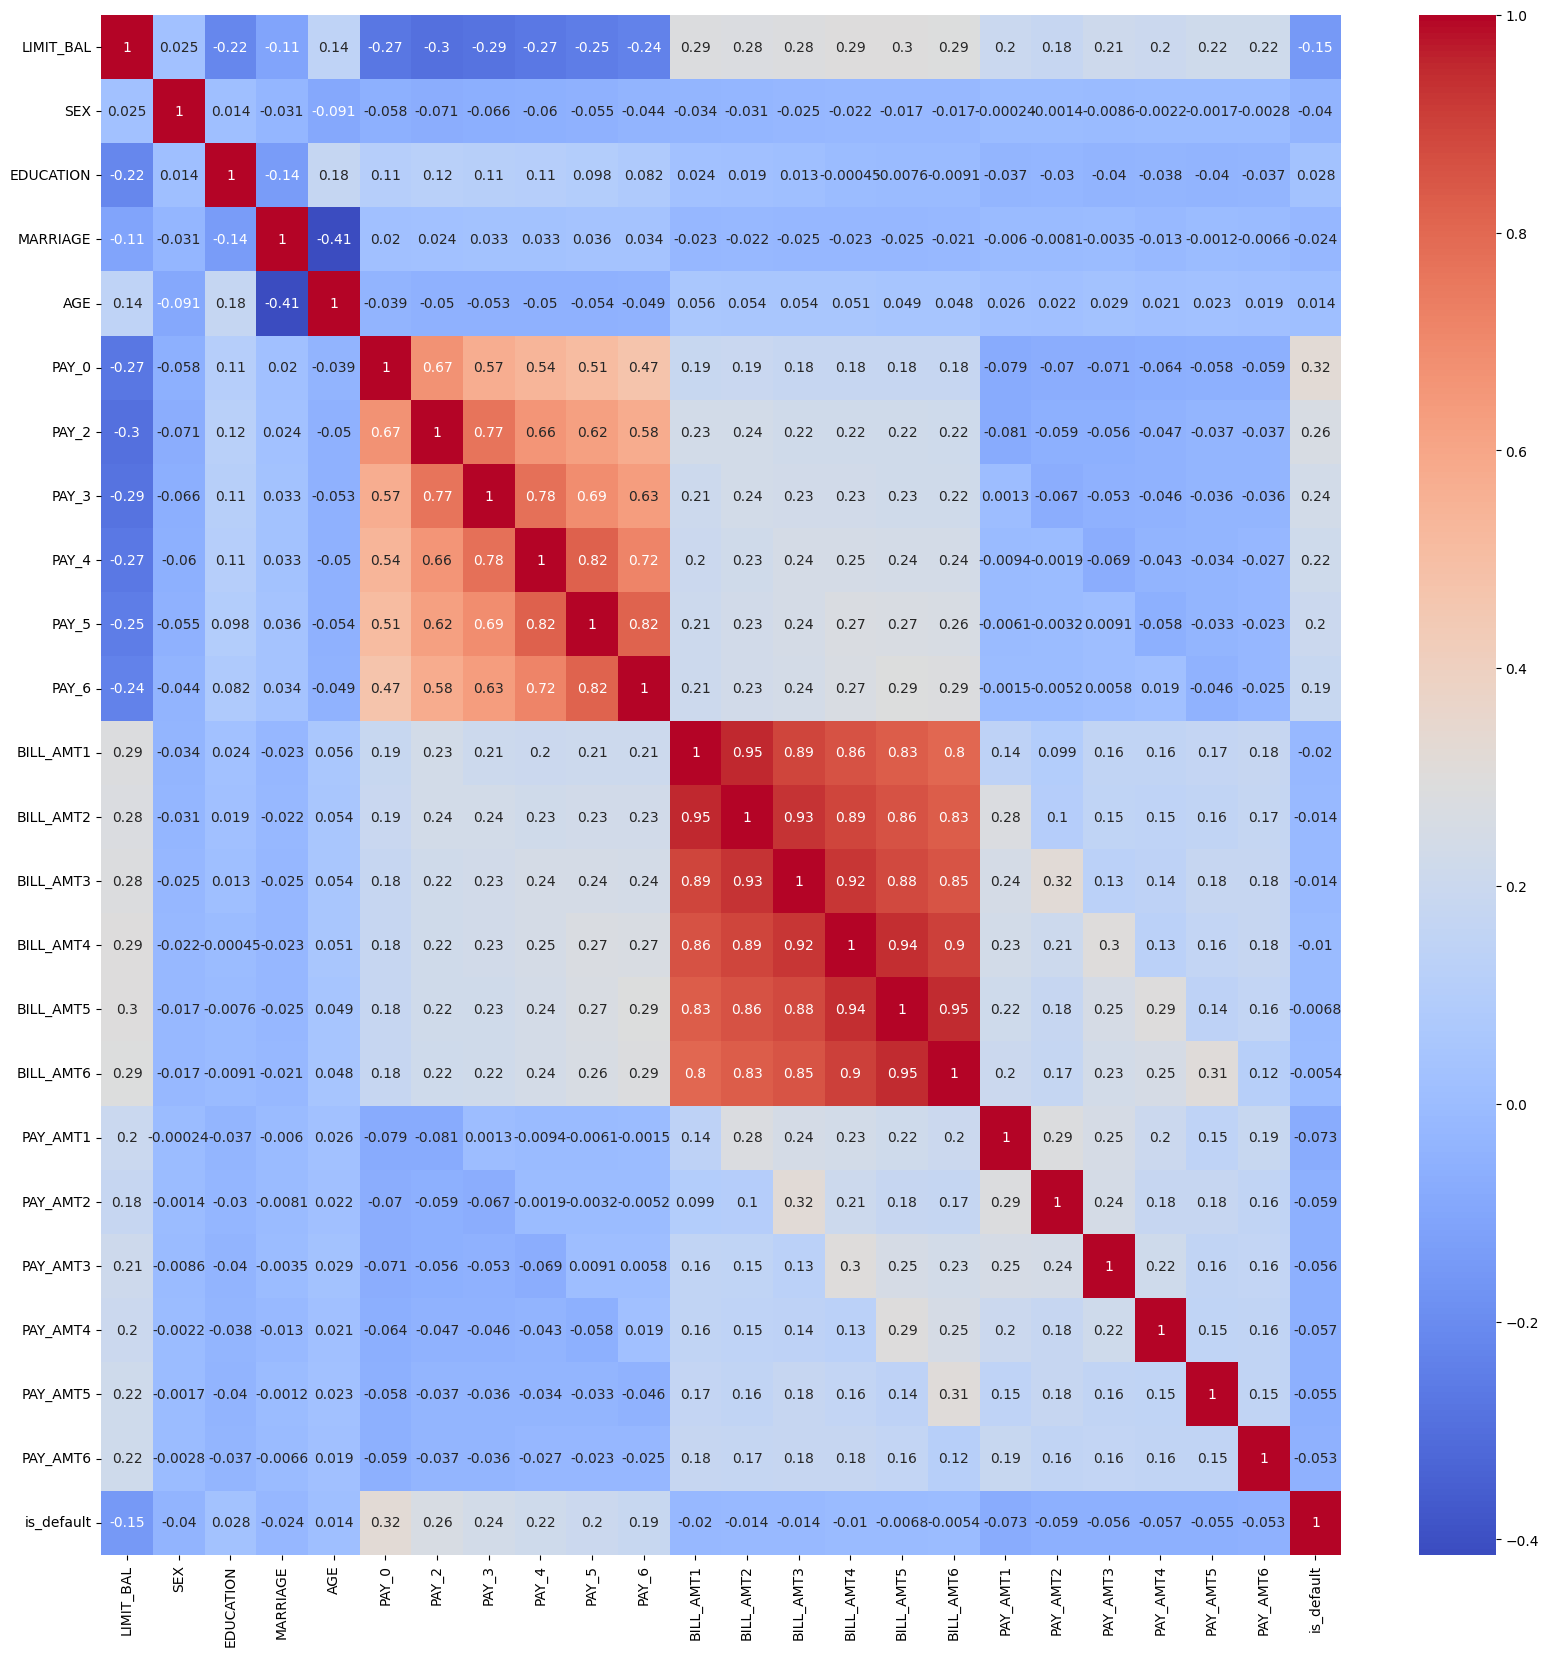

In [27]:
# Create a heatmap displying the correlation coefficients of the variables
corr = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### Interpretation:


1. **Past Payment Statuses (`PAY_0` to `PAY_6`)** are strongly correlated with each other, indicating consistency in payment behavior over time.
   
2. **Bill Amounts (`BILL_AMT1` to `BILL_AMT6`)** are highly correlated, suggesting that clients’ monthly bills tend to remain stable.

3. **Credit Limit (`LIMIT_BAL`)** shows a moderate positive correlation with bill amounts, implying that higher credit limits often result in higher bills.

4. **Default Risk (`is_default`)** has a moderate positive correlation with delayed payment statuses, indicating that past delays are a strong predictor of default.

5. **Age** has weak correlations with most features, suggesting it may not be a significant factor in predicting default or credit behavior.

6. **Sex and Marriage Status** also show weak correlations with other features, indicating limited impact on the overall credit behavior.

7. **Education Level** has weak correlations with payment statuses and bill amounts, indicating that education may not directly influence payment behavior.


## Section 5: Feature Engineering
Feature engineering is the process of creating new input features or modifying existing ones to improve the performance of machine learning models. This involves transforming raw data into a format that better captures the underlying patterns and relationships relevant to the predictive task, often through techniques like creating interaction terms, binning, encoding categorical variables, scaling, or generating new features based on domain knowledge. Effective feature engineering can significantly enhance a model's accuracy and interpretability by making the most important information more accessible to the algorithm.



### 5.1 Feature Encoding
Feature encoding is the process of converting categorical variables into a numerical format that can be used by machine learning algorithms. Since most algorithms require numerical input, feature encoding is essential for handling non-numeric data.

In [28]:
# Binning the age data
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=[20, 30, 40, 50, 60, 70, 80], include_lowest=True)

# Dropping the 'age' colummn as the data is now represented as bins
data = data.drop("AGE", axis=1)

# List down the categorical columns
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_GROUP']

# Perform the encoding for the categorical variables
data = pd.get_dummies(data, columns=categorical_features)

# View the data
data.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,"AGE_GROUP_(19.999, 30.0]","AGE_GROUP_(30.0, 40.0]","AGE_GROUP_(40.0, 50.0]","AGE_GROUP_(50.0, 60.0]","AGE_GROUP_(60.0, 70.0]","AGE_GROUP_(70.0, 80.0]"
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,...,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,...,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,...,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,...,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,...,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False


#### Observation:
 Now, the dataset is ready for model building.

## Section 6: Model Building
To perform classification, we need to do the following on the dataset:
- Separate the dataset into features & target variable
- Split into training & testing data
- Fit the model
- Check the results

<center><img src="https://www.machinelearningplus.com/wp-content/uploads/2022/12/train_test_split-procedure.jpg" width=600 height=300/></center>

### 6.1 Logistic Regression

- Logistic regression is used to predict a binary outcome (e.g., yes/no, 0/1) based on input features.
- It uses the logistic function (or sigmoid curve) to map predicted values to probabilities between 0 and 1.
- If the predicted probability is above a certain threshold (typically 0.5), the model classifies the instance as 1 (e.g., "yes"); otherwise, it classifies it as 0 (e.g., "no").
<center><img src="https://miro.medium.com/v2/resize:fit:1000/1*vC--ianl5Ua7hQjnivYUww.png" width=400 height=300/></center>
- During training, the model adjusts the weights of the features to best fit the training data, minimizing the difference between predicted probabilities and actual outcomes.



In [29]:
# Separating the features and target
target = data["is_default"]
features = data.drop(["is_default"], axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [30]:
# Scaling the data

# Importing the library
from sklearn.preprocessing import StandardScaler


# Perform scaling operation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



#### Implementation of Logistic Regression

This code block performs the following tasks:
- Imports necessary libraries.
- Initializes and fits a logistic regression model.
- Makes predictions on the test data.
- Evaluates the model using various metrics.
- Displays the evaluation results, including accuracy and classification metrics.


In [31]:
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state = 42, max_iter=2000)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### How to find whether the model has learnt well to make accurate classifications?

Model Evaluation.

#### Confusion Matrix:
A confusion matrix is a table used to evaluate the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives.
<center><img src="https://miro.medium.com/v2/resize:fit:552/1*iRT_2S0F7X9zqC8gsCKyfA.png" width =400 height=300/>
<img src=" https://miro.medium.com/v2/resize:fit:974/1*H_XIN0mknyo0Maw4pKdQhw.png" width=500 height=300/></center>

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy of Logistic Regression model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy of Logistic Regression model: 0.8106666666666666
Confusion Matrix:
 [[4552  135]
 [1001  312]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



#### Interpretation:

- The overall accuracy of 81% is high, but this is largely due to the model's strong performance on the majority class (`0`), which dominates the dataset. This suggests the model may be biased towards predicting the majority class.

- The recall for class `1` is significantly lower than that for class `0`. This indicates that the model fails to identify a large portion of the minority class, leading to many false negatives.

- The F1-score for class `1` is much lower than for class `0`, reflecting the challenge in balancing precision and recall for the minority class in the presence of class imbalance.

- The macro average F1-score is lower than the weighted average, highlighting that the model's performance is skewed towards the majority class, and it struggles with the minority class due to the imbalance.

These interpretations suggest that the model's strong performance is misleading due to class imbalance, and handling this imbalance (e.g., using SMOTE, class weighting, etc.) would likely lead to a more balanced and fair evaluation of model performance.

### 6.2 Handling class imbalance


In [34]:
# Importing the necessary libraries
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Initialize the Logistic Regression model
logistic_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000)

# Fit the model on the training data
logistic_model.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)

# Print the accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6806666666666666
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.66      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.67      0.62      6000
weighted avg       0.77      0.68      0.71      6000



#### Interpretation:

- After applying SMOTE, the recall, f1-score for class `1` (the minority class) increased, indicating that the model is now better at identifying actual instances of the minority class.

- The overall accuracy dropped slightly, which is expected when applying SMOTE, as the model now has to consider the synthetic data points, making it less biased towards the majority class.

- The performance for the majority class (`0`) remains strong, with a slight decrease in precision and recall, which is a common trade-off when handling class imbalance using techniques like SMOTE.


### 6.3 K-Nearest Neighbors

- The K-Nearest Neighbors (KNN) algorithm is a simple, yet powerful machine learning technique used for both classification and regression tasks.
- It works by identifying the 'k' closest data points (neighbors) to a given input, based on a chosen distance metric such as Euclidean distance.
- For classification, KNN assigns the most common class among these neighbors to the new instance, while in regression, it predicts the value by averaging the neighbors' outputs.
- KNN is a non-parametric, instance-based learning algorithm, meaning it doesn't learn an explicit model during training but instead stores the entire training dataset and makes predictions by directly comparing new inputs to the stored data.
- While KNN is easy to understand and implement, it can be computationally expensive during the prediction phase, especially with large datasets, and is sensitive to the choice of 'k' and the distance metric used.
- Despite these challenges, KNN remains a popular choice for problems where interpretability and simplicity are valued.

<center><img src="https://www.researchgate.net/publication/341831889/figure/fig2/AS:903350463787009@1592386942516/KNN-K-NN-Algorithms-K-NN-algo-following-some-steps-1-Pick-a-value-for-K-2-Calculate.ppm" width=500 /></center>

In [35]:
# Importing the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      4687
           1       0.35      0.59      0.44      1313

    accuracy                           0.67      6000
   macro avg       0.60      0.64      0.60      6000
weighted avg       0.75      0.67      0.70      6000



#### Interpretation
- KNN model has lesser accuracy than logistic regression model and also performs similar in handling the `class 0` samples.

### 6.4 Finding optimal number of neigbours for KNN

In [36]:
# Initialize dictionaries to store training and testing scores for each value of n_neighbors
train_score = {}
test_score = {}

# Create an array of values for the number of neighbors (n_neighbors) ranging from 2 to 29
n_neighbors = np.arange(2, 30, 1)

# Loop over each value of n_neighbors to evaluate the model
for neighbor in n_neighbors:
    # Initialize the KNeighborsClassifier with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the KNN model to the training data
    knn.fit(X_train, y_train)

    # Store the training accuracy for the current number of neighbors
    train_score[neighbor] = knn.score(X_train, y_train)

    # Store the testing accuracy for the current number of neighbors
    test_score[neighbor] = knn.score(X_test, y_test)


#### Plotting the train and test scores

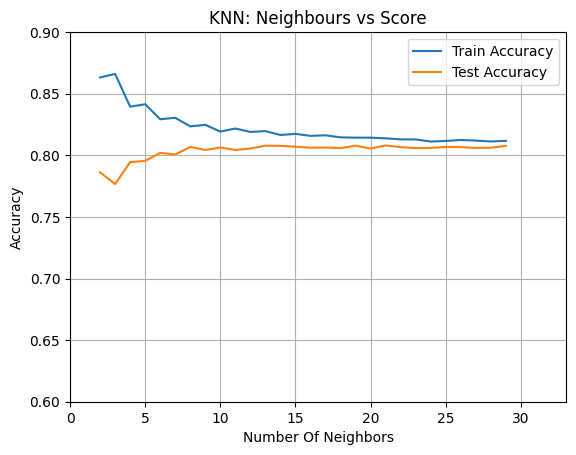

In [37]:
# Plot the training accuracy against the number of neighbors
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")

# Plot the testing accuracy against the number of neighbors
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")

plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Neighbours vs Score")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

#### How to Choose the Optimal `n_neighbors` for KNN:


   - As seen in the plot, the training accuracy decreases with an increasing number of neighbors, while the test accuracy initially increases and then stabilizes. The optimal `n_neighbors` is where the test accuracy plateaus, balancing the trade-off between bias and variance.
   - Based on the graph, the test accuracy stabilizes around `n_neighbors` around 10 to 20. You might choose a value within this range, as it offers a good balance between training and test accuracy.
   - Smaller values of `n_neighbors` (e.g., 1-5) show higher training accuracy but lower test accuracy, indicating overfitting. These values may capture noise in the training data rather than general patterns.
   - Very large values of `n_neighbors` lead to both lower training and test accuracy, which could indicate underfitting, as the model becomes too generalized.


#### Build the model with neighbours as 10

In [38]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      4687
           1       0.38      0.58      0.46      1313

    accuracy                           0.70      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.70      0.72      6000



#### Interpretation:
 - The metrics have improved slightly.

### Trying Undersampler & Oversampler instead of SMOTE

In [39]:
from imblearn.over_sampling import RandomOverSampler
# Apply RandomOverSampler to balance the classes
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      4687
           1       0.38      0.56      0.45      1313

    accuracy                           0.70      6000
   macro avg       0.62      0.65      0.62      6000
weighted avg       0.75      0.70      0.72      6000



In [40]:
from imblearn.under_sampling import RandomUnderSampler
# Apply RandomOverSampler to balance the classes
ros = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4687
           1       0.43      0.52      0.47      1313

    accuracy                           0.74      6000
   macro avg       0.64      0.66      0.65      6000
weighted avg       0.76      0.74      0.75      6000



#### Interpretation:
- The metrics have slightly improved but overall it seems that KNN is not best suited when the data suffers from class imbalance.

K-Nearest Neighbors (KNN) is particularly sensitive to class imbalance because it relies on the majority vote of its neighbors to classify a data point. In a highly imbalanced dataset, the majority class can dominate the neighborhood, leading to a bias where the model frequently predicts the majority class, even for minority class instances.

#### **Effects of Resampling on KNN**:

1. **After Oversampling**:
   - When using techniques like SMOTE (Synthetic Minority Over-sampling Technique), KNN can perform better because the minority class is more evenly represented in the neighborhood. This allows the model to consider more minority class instances during the classification decision, which can improve recall and overall balance.
   - However, oversampling also introduces synthetic data points that might not fully capture the underlying distribution, which can sometimes lead to overfitting, especially in KNN where the model is sensitive to slight changes in the neighborhood.

2. **After Undersampling**:
   - Undersampling reduces the majority class to balance with the minority class, which can make KNN less prone to bias towards the majority class. This can improve precision and recall for the minority class.
   - The downside is that undersampling may discard useful majority class information, leading to a reduction in the overall accuracy and potential underfitting, where the model might not capture the full complexity of the data.


KNN can benefit from resampling techniques like oversampling (SMOTE) or undersampling to handle class imbalance. However, because KNN is inherently sensitive to the local structure of data, the effectiveness of resampling will depend on how well the resampled data represents the true distribution of the classes. In scenarios where class imbalance is significant, and especially when the minority class is crucial, KNN may still struggle without careful tuning and validation. Thus, resampling can help, but it may not completely eliminate the challenges KNN faces with class imbalance.

<hr><hr>